# 官方教程 - 10分钟入门pandas

> 教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)，有删改，[点击直达最新文档地址](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

```{admonition} 在线刷题
:class: seealso

检查 or 强化 `Pandas` 数据分析操作？<a href="https://www.heywhale.com/mw/project/6146c0318447b8001769ff20" target="_blank">👉在线体验「Pandas进阶修炼300题」</a>
```

```{note} 
本页面代码可以[在线编辑、执行](../指引/在线执行.md)！

首先导入 Python 数据处理中常用的三个库，如果没有需要提前使用 `pip` 安装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

注：本教程基于Pandas0.18.0版本，因版本不同可能有些代码无法成功执行，请自行查阅解决办法

## 创建数据

使用pd.Series创建Series对象

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过numpy的array数据来创建DataFrame对象

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,0.233144,-1.511865,0.680772,-1.501919
2013-01-02,-0.242763,0.386914,0.604674,1.217106
2013-01-03,0.429295,-1.903990,0.685600,-0.515168
2013-01-04,1.715532,0.368451,-0.468713,0.658009
2013-01-05,-0.583251,-1.089317,2.167133,-0.702242
2013-01-06,-1.430271,0.485095,-2.444374,0.471055


通过字典创建DataFrame对象

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
dir(df2)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '_

## 数据查看

基本方法，务必掌握，更多相关查看数据的方法可以参与[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics)

下面分别是查看数据的顶部和尾部的方法

In [12]:
df.head()

,A,B,C,D
2013-01-01,0.233144,-1.511865,0.680772,-1.501919
2013-01-02,-0.242763,0.386914,0.604674,1.217106
2013-01-03,0.429295,-1.903990,0.685600,-0.515168
2013-01-04,1.715532,0.368451,-0.468713,0.658009
2013-01-05,-0.583251,-1.089317,2.167133,-0.702242


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,1.715532,0.368451,-0.468713,0.658009
2013-01-05,-0.583251,-1.089317,2.167133,-0.702242
2013-01-06,-1.430271,0.485095,-2.444374,0.471055


查看DataFrame对象的索引，列名，数据信息

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 0.23314426, -1.51186546,  0.68077238, -1.50191899],
       [-0.24276257,  0.38691387,  0.60467392,  1.21710606],
       [ 0.42929455, -1.90398959,  0.68560004, -0.51516821],
       [ 1.71553222,  0.36845052, -0.46871257,  0.65800944],
       [-0.58325101, -1.0893167 ,  2.16713277, -0.70224183],
       [-1.43027085,  0.48509495, -2.44437432,  0.47105545]])

描述性统计

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.020281,-0.544119,0.204182,-0.062193
std,1.060568,1.080917,1.545323,1.012651
min,-1.430271,-1.903990,-2.444374,-1.501919
25%,-0.498129,-1.406228,-0.200366,-0.655473
50%,-0.004809,-0.360433,0.642723,-0.022056
75%,0.380257,0.382298,0.684393,0.611271
max,1.715532,0.485095,2.167133,1.217106


数据转置

In [18]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.233144,-0.242763,0.429295,1.715532,-0.583251,-1.430271
B,-1.511865,0.386914,-1.903990,0.368451,-1.089317,0.485095
C,0.680772,0.604674,0.685600,-0.468713,2.167133,-2.444374
D,-1.501919,1.217106,-0.515168,0.658009,-0.702242,0.471055


根据列名排序

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.501919,0.680772,-1.511865,0.233144
2013-01-02,1.217106,0.604674,0.386914,-0.242763
2013-01-03,-0.515168,0.685600,-1.903990,0.429295
2013-01-04,0.658009,-0.468713,0.368451,1.715532
2013-01-05,-0.702242,2.167133,-1.089317,-0.583251
2013-01-06,0.471055,-2.444374,0.485095,-1.430271


根据B列数值排序

In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.429295,-1.903990,0.685600,-0.515168
2013-01-01,0.233144,-1.511865,0.680772,-1.501919
2013-01-05,-0.583251,-1.089317,2.167133,-0.702242
2013-01-04,1.715532,0.368451,-0.468713,0.658009
2013-01-02,-0.242763,0.386914,0.604674,1.217106
2013-01-06,-1.430271,0.485095,-2.444374,0.471055


## 数据选取

官方建议使用优化的熊猫数据访问方法`.at，.iat，.loc`和`.iloc`，部分较早的pandas版本可以使用`.ix`

这些选取函数的使用需要熟练掌握，我也曾写过相关文章帮助理解

- [5分钟学会Pandas中iloc/loc/ix区别](https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw)

### 使用\[\]选取数据

选取单列数据，等效于`df.A`:

In [21]:
df['A']

2013-01-01    0.233144
2013-01-02   -0.242763
2013-01-03    0.429295
2013-01-04    1.715532
2013-01-05   -0.583251
2013-01-06   -1.430271
Freq: D, Name: A, dtype: float64

按行选取数据，使用[]

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,0.233144,-1.511865,0.680772,-1.501919
2013-01-02,-0.242763,0.386914,0.604674,1.217106
2013-01-03,0.429295,-1.903990,0.685600,-0.515168


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.242763,0.386914,0.604674,1.217106
2013-01-03,0.429295,-1.903990,0.685600,-0.515168
2013-01-04,1.715532,0.368451,-0.468713,0.658009


### 通过标签选取数据

In [24]:
df.loc[dates[0]]

A    0.233144
B   -1.511865
C    0.680772
D   -1.501919
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.233144,-1.511865
2013-01-02,-0.242763,0.386914
2013-01-03,0.429295,-1.903990
2013-01-04,1.715532,0.368451
2013-01-05,-0.583251,-1.089317
2013-01-06,-1.430271,0.485095


In [26]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.242763,0.386914
2013-01-03,0.429295,-1.903990
2013-01-04,1.715532,0.368451


In [27]:
df.loc['20130102',['A','B']]

A   -0.242763
B    0.386914
Name: 2013-01-02 00:00:00, dtype: float64

In [28]:
df.loc[dates[0],'A']

0.2331442571548058

In [29]:
df.at[dates[0],'A']

0.2331442571548058

### 通过位置选取数据

In [30]:
df.iloc[3]

A    1.715532
B    0.368451
C   -0.468713
D    0.658009
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.715532,0.368451
2013-01-05,-0.583251,-1.089317


In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.242763,0.604674
2013-01-03,0.429295,0.685600
2013-01-05,-0.583251,2.167133


In [33]:
df.iloc[1:3]

,A,B,C,D
2013-01-02,-0.242763,0.386914,0.604674,1.217106
2013-01-03,0.429295,-1.903990,0.685600,-0.515168


In [34]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.511865,0.680772
2013-01-02,0.386914,0.604674
2013-01-03,-1.903990,0.685600
2013-01-04,0.368451,-0.468713
2013-01-05,-1.089317,2.167133
2013-01-06,0.485095,-2.444374


In [35]:
df.iloc[1, 1]

0.38691386765525804

In [36]:
df.iat[1, 1]

0.38691386765525804

### 使用布尔索引 

In [37]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.233144,-1.511865,0.680772,-1.501919
2013-01-03,0.429295,-1.903990,0.685600,-0.515168
2013-01-04,1.715532,0.368451,-0.468713,0.658009


In [38]:
df[df>0]

,A,B,C,D
2013-01-01,0.233144,NaN,0.680772,NaN
2013-01-02,NaN,0.386914,0.604674,1.217106
2013-01-03,0.429295,NaN,0.685600,NaN
2013-01-04,1.715532,0.368451,NaN,0.658009
2013-01-05,NaN,NaN,2.167133,NaN
2013-01-06,NaN,0.485095,NaN,0.471055


In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one', 'one','two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,0.233144,-1.511865,0.680772,-1.501919,one
2013-01-02,-0.242763,0.386914,0.604674,1.217106,one
2013-01-03,0.429295,-1.903990,0.685600,-0.515168,two
2013-01-04,1.715532,0.368451,-0.468713,0.658009,three
2013-01-05,-0.583251,-1.089317,2.167133,-0.702242,four
2013-01-06,-1.430271,0.485095,-2.444374,0.471055,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.429295,-1.903990,0.685600,-0.515168,two
2013-01-05,-0.583251,-1.089317,2.167133,-0.702242,four


## 缺失值处理

**reindex**

Pandas中使用`np.nan`来表示缺失值，可以使用`reindex`更改/添加/删除指定轴上的索引

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [44]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [45]:
df1

,A,B,C,D,E
2013-01-01,0.233144,-1.511865,0.680772,-1.501919,1.0
2013-01-02,-0.242763,0.386914,0.604674,1.217106,1.0
2013-01-03,0.429295,-1.903990,0.685600,-0.515168,NaN
2013-01-04,1.715532,0.368451,-0.468713,0.658009,NaN


### 删除缺失值
舍弃含有NaN的行

In [46]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.233144,-1.511865,0.680772,-1.501919,1.0
2013-01-02,-0.242763,0.386914,0.604674,1.217106,1.0


### 填充缺失值
填充缺失数据

In [47]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.233144,-1.511865,0.680772,-1.501919,1.0
2013-01-02,-0.242763,0.386914,0.604674,1.217106,1.0
2013-01-03,0.429295,-1.903990,0.685600,-0.515168,5.0
2013-01-04,1.715532,0.368451,-0.468713,0.658009,5.0


In [48]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## 常用操作

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于Pandas常用操作介绍！

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！

### 统计

在进行统计操作时需要排除缺失值！

**描述性统计👇**

纵向求均值

In [49]:
df.mean()

A    0.020281
B   -0.544119
C    0.204182
D   -0.062193
dtype: float64

横向求均值

In [50]:
df.mean(1)

2013-01-01   -0.524967
2013-01-02    0.491483
2013-01-03   -0.326066
2013-01-04    0.568320
2013-01-05   -0.051919
2013-01-06   -0.729624
Freq: D, dtype: float64

In [51]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [52]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.570705,-2.903990,-0.314400,-1.515168
2013-01-04,-1.284468,-2.631549,-3.468713,-2.341991
2013-01-05,-5.583251,-6.089317,-2.832867,-5.702242
2013-01-06,NaN,NaN,NaN,NaN


### Apply函数

In [54]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.233144,-1.511865,0.680772,-1.501919
2013-01-02,-0.009618,-1.124952,1.285446,-0.284813
2013-01-03,0.419676,-3.028941,1.971046,-0.799981
2013-01-04,2.135208,-2.660491,1.502334,-0.141972
2013-01-05,1.551957,-3.749807,3.669467,-0.844214
2013-01-06,0.121687,-3.264712,1.225092,-0.373158


In [55]:
df.apply(lambda x: x.max() - x.min())

A    3.145803
B    2.389085
C    4.611507
D    2.719025
dtype: float64

### value_counts()

文档中为`Histogramming`，但示例就是`.value_counts()`的使用

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [57]:
s

0    4
1    4
2    1
3    5
4    4
5    2
6    1
7    6
8    1
9    3
dtype: int64

In [58]:
s.value_counts()

4    3
1    3
6    1
5    1
3    1
2    1
dtype: int64

### 字符串方法

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [60]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

### Concat

在连接/合并类型操作的情况下，pandas提供了各种功能，可以轻松地将Series和DataFrame对象与各种用于索引和关系代数功能的集合逻辑组合在一起。

In [61]:
df = pd.DataFrame(np.random.randn(10, 4))

In [62]:
df

,0,1,2,3
0,0.651906,-0.218929,-0.307662,0.637816
1,0.308388,0.936113,-0.000300,0.450567
2,-1.269843,1.023067,-1.419864,-0.246430
3,0.861695,0.375618,1.690361,0.444189
4,-0.116484,1.228583,-0.588601,1.297584
5,-0.054983,0.937898,-1.207095,0.410896
6,-1.829341,-0.832101,-1.441151,-0.189501
7,-0.534424,-0.286484,-1.720807,0.918849
8,0.703352,-1.344309,0.886629,1.456337
9,0.803016,-0.609713,-0.289005,-1.433010


In [63]:
pieces = [df[:3], df[3:6], df[7:]]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,0.651906,-0.218929,-0.307662,0.637816
1,0.308388,0.936113,-0.000300,0.450567
2,-1.269843,1.023067,-1.419864,-0.246430
3,0.861695,0.375618,1.690361,0.444189
4,-0.116484,1.228583,-0.588601,1.297584
5,-0.054983,0.937898,-1.207095,0.410896
7,-0.534424,-0.286484,-1.720807,0.918849
8,0.703352,-1.344309,0.886629,1.456337
9,0.803016,-0.609713,-0.289005,-1.433010


**注意**

将列添加到DataFrame相对较快。 

但是，添加一行需要一个副本，并且可能浪费时间

我们建议将预构建的记录列表传递给DataFrame构造函数，而不是通过迭代地将记录追加到其来构建DataFrame

### Join

In [65]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [66]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [67]:
left

,key,lval
0,foo,1
1,foo,2


In [68]:
right

,key,rval
0,foo,4
1,foo,5


In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [70]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [71]:
df

,A,B,C,D
0,0.127724,1.019741,-1.112654,-0.245925
1,-1.045677,-0.330663,-0.961496,-2.285251
2,0.037611,-0.099874,-0.642041,-0.150320
3,-0.862551,-0.479700,1.112674,-0.160029
4,1.339245,-1.219858,1.291752,-1.315174
5,0.005500,-1.909531,-0.367324,0.639256
6,0.250626,0.610614,1.694864,0.585699
7,1.704621,-1.361670,0.010408,1.013563


In [72]:
s = df.iloc[3]

In [73]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.127724,1.019741,-1.112654,-0.245925
1,-1.045677,-0.330663,-0.961496,-2.285251
2,0.037611,-0.099874,-0.642041,-0.150320
3,-0.862551,-0.479700,1.112674,-0.160029
4,1.339245,-1.219858,1.291752,-1.315174
5,0.005500,-1.909531,-0.367324,0.639256
6,0.250626,0.610614,1.694864,0.585699
7,1.704621,-1.361670,0.010408,1.013563
8,-0.862551,-0.479700,1.112674,-0.160029


## 数据分组

**数据分组**是指涉及以下一个或多个步骤的过程：

- 根据某些条件将数据分成几组

- 对每个组进行独立的操作

- 对结果进行合并

更多操作可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [74]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.486452,-0.611870
1,bar,one,-0.361037,-1.246082
2,foo,two,1.334057,-0.647302
3,bar,three,1.493908,0.312247
4,foo,two,0.004777,-0.918293
5,bar,two,0.233194,0.081142
6,foo,one,1.065494,0.851790
7,foo,three,1.315712,-1.125428


In [75]:
df.groupby('A').sum()

,C,D
A,,
bar,1.366065,-0.852694
foo,5.206492,-2.451103


In [76]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.361037 -1.246082
    three  1.493908  0.312247
    two    0.233194  0.081142
foo one    2.551946  0.239920
    three  1.315712 -1.125428
    two    1.338834 -1.565595

## 数据重塑

### 数据堆叠
可以进行数据压缩

In [77]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))

In [78]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [79]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [80]:
df2 = df[:4]

In [81]:
df2

A         B
first second                    
bar   one    -0.855239 -1.730941
      two     1.100837  0.758912
baz   one     0.097947  0.951143
      two     0.978048  0.558107

In [82]:
stacked = df2.stack()

In [83]:
stacked

first  second   
bar    one     A   -0.855239
               B   -1.730941
       two     A    1.100837
               B    0.758912
baz    one     A    0.097947
               B    0.951143
       two     A    0.978048
               B    0.558107
dtype: float64

stack()的反向操作是unstack()，默认情况下，它会将最后一层数据进行unstack():

In [84]:
stacked.unstack()

A         B
first second                    
bar   one    -0.855239 -1.730941
      two     1.100837  0.758912
baz   one     0.097947  0.951143
      two     0.978048  0.558107

In [85]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.855239  1.100837
      B -1.730941  0.758912
baz   A  0.097947  0.978048
      B  0.951143  0.558107

In [86]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.855239  0.097947
       B -1.730941  0.951143
two    A  1.100837  0.978048
       B  0.758912  0.558107

### 数据透视表

In [87]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [88]:
df

,A,B,C,D,E
0,one,A,foo,-1.780269,0.147723
1,one,B,foo,-0.388055,0.323940
2,two,C,foo,-1.372977,0.188704
3,three,A,bar,-0.051246,-1.025244
4,one,B,bar,0.320181,-0.444826
5,one,C,bar,0.803996,0.914407
6,two,A,foo,-1.314590,-0.521226
7,three,B,foo,-0.598236,-0.275768
8,one,C,foo,0.313047,1.900364
9,one,A,bar,0.305760,-0.904006


In [89]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   A  0.305760 -1.780269
      B  0.320181 -0.388055
      C  0.803996  0.313047
three A -0.051246       NaN
      B       NaN -0.598236
      C  0.790147       NaN
two   A       NaN -1.314590
      B -2.570168       NaN
      C       NaN -1.372977

## 时间序列

对于在频率转换期间执行重采样操作(例如，将秒数据转换为5分钟数据)，pandas具有简单、强大和高效的功能。这在金融应用中非常常见，但不仅限于此。 参见[时间序列](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)部分。

时区表示

In [90]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [91]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [92]:
ts.resample('5Min').sum()

2012-01-01    26109
Freq: 5T, dtype: int64

In [93]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [94]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [95]:
ts

2012-03-06    0.675078
2012-03-07    0.903645
2012-03-08   -0.635701
2012-03-09   -0.212734
2012-03-10   -1.245500
Freq: D, dtype: float64

In [96]:
ts_utc = ts.tz_localize('UTC')

In [97]:
ts_utc

2012-03-06 00:00:00+00:00    0.675078
2012-03-07 00:00:00+00:00    0.903645
2012-03-08 00:00:00+00:00   -0.635701
2012-03-09 00:00:00+00:00   -0.212734
2012-03-10 00:00:00+00:00   -1.245500
Freq: D, dtype: float64

时区转换

In [98]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.675078
2012-03-06 19:00:00-05:00    0.903645
2012-03-07 19:00:00-05:00   -0.635701
2012-03-08 19:00:00-05:00   -0.212734
2012-03-09 19:00:00-05:00   -1.245500
Freq: D, dtype: float64

在时间跨度表示之间进行转换

In [99]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [100]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [101]:
ts

2012-01-31   -0.314175
2012-02-29   -0.802753
2012-03-31   -0.713933
2012-04-30   -0.458082
2012-05-31    0.015636
Freq: M, dtype: float64

In [102]:
ps = ts.to_period()

In [103]:
ps

2012-01   -0.314175
2012-02   -0.802753
2012-03   -0.713933
2012-04   -0.458082
2012-05    0.015636
Freq: M, dtype: float64

In [104]:
ps.to_timestamp()

2012-01-01   -0.314175
2012-02-01   -0.802753
2012-03-01   -0.713933
2012-04-01   -0.458082
2012-05-01    0.015636
Freq: MS, dtype: float64

在周期和时间戳之间转换可以使用一些方便的算术函数。 

在以下示例中，我们将以11月结束的年度的季度频率转换为季度结束后的月末的上午9点：

In [105]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [106]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [107]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [108]:
ts.head()

1990-03-01 09:00    1.716325
1990-06-01 09:00   -1.234487
1990-09-01 09:00    0.261776
1990-12-01 09:00   -1.012196
1991-03-01 09:00    0.870237
Freq: H, dtype: float64

事实上，常用有关时间序列的操作远超过上方的官方示例，简单来说与日期有关的操作从创建到转换pandas都能很好的完成！

## 灵活的使用分类数据

Pandas可以在一个DataFrame中包含分类数据。有关完整文档，请参阅分类介绍和API文档。

In [109]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [110]:
df['grade'] = df['raw_grade'].astype("category")

In [111]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

将类别重命名为更有意义的名称(`Series.cat.categories()`)

In [112]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序类别，并同时添加缺少的类别(在有缺失的情况下，string .cat()下的方法返回一个新的系列)。

In [113]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [114]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [115]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [116]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 数据可视化

In [117]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [118]:
ts.head()

2000-01-01    0.022163
2000-01-02    1.922500
2000-01-03    1.218327
2000-01-04   -0.865436
2000-01-05   -0.949639
Freq: D, dtype: float64

In [119]:
ts = ts.cumsum() #累加

在Pandas中可以使用`.plot()`直接绘图，支持多种图形和自定义选项点击可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#plotting)

<AxesSubplot:>

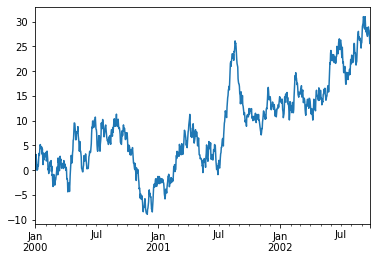

In [120]:
ts.plot()

In [121]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

In [122]:
df = df.cumsum()

使用`plt`绘图，具体参数设置可以查阅matplotlib官方文档

<Figure size 432x288 with 0 Axes>

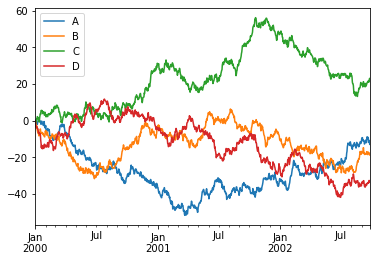

In [123]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 导入导出数据

**将数据写入`csv`，如果有中文需要注意编码**

In [124]:
# df.to_csv('foo.csv')

从`csv`中读取数据

In [125]:
# pd.read_csv('foo.csv').head()

将数据导出为`hdf`格式

In [126]:
# df.to_hdf('foo.h5','df')

从`hdf`文件中读取数据前五行

In [127]:
# pd.read_hdf('foo.h5','df').head()

将数据保存为`xlsx`格式

In [128]:
# df.to_excel('foo.xlsx', sheet_name='Sheet1')

从`xlsx`格式中按照指定要求读取sheet1中数据

In [129]:
# pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()